Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Gómez Meza Jorge Ángel"
COLLABORATORS = ""

---

<div class="alert alert-success">

# Objetivos

El propósito de este ejercicio es que  compares el rendimiento de diversos algoritmos de agrupamiento

In [39]:
# Bibliotecas básicas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from macti.eval import *

In [40]:
quiz = Quiz('1','mdp')

In [41]:
# Conjunto de datos Iris
from sklearn.datasets import load_iris
iris = load_iris()
iris.data.shape, np.unique(iris.target), iris.target_names, iris.feature_names

((150, 4),
 array([0, 1, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [42]:
# Conservamos solamente las tres primeras columnas
datos = iris.data[:,:3]

In [43]:
from sklearn.preprocessing import normalize
#print(datos)
# Aplica "normalize" al conjunto de datos
#from sklearn...
#datos = 

print(type(datos))
data_scaled = normalize(datos)
data_scaled=pd.DataFrame(data_scaled,columns=iris.feature_names[:3])

print (iris.feature_names[:3])
data_scaled.head()




<class 'numpy.ndarray'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']


,sepal length (cm),sepal width (cm),petal length (cm)
0,0.804172,0.551883,0.220753
1,0.828606,0.507310,0.236745
2,0.805806,0.548634,0.222883
3,0.800515,0.539477,0.261037
4,0.791361,0.569780,0.221581


In [44]:
#!pip install yellowbrick

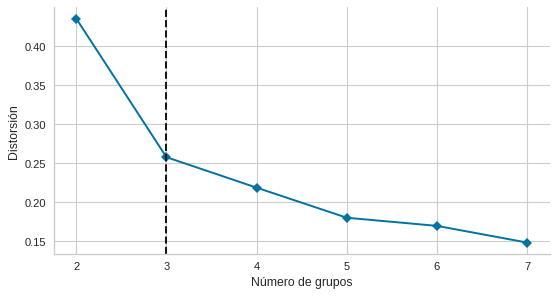

In [45]:
# Obtén la recomendación respecto al número de grupos con la gráfica del codo
# Con el valor 42 para el parámetro de replicabilidad y valores de k=(2,8)
# Instalar yellowbrick, de ser necesario descomenta la siguiente línea
#!pip install yellowbrick
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(8, 4))

vis = KElbowVisualizer(KMeans(random_state=42), k=(2,8), timings=False)
vis.fit(data_scaled)
plt.xlabel('Número de grupos')
plt.ylabel('Distorsión')
plt.show()

#vis = KElbowVisualizer(...)
#vis.fit(datos)
# YOUR CODE HERE
#raise NotImplementedError()
#plt.xlabel('Número de grupos')
#plt.ylabel('Distorsión')
#plt.show()

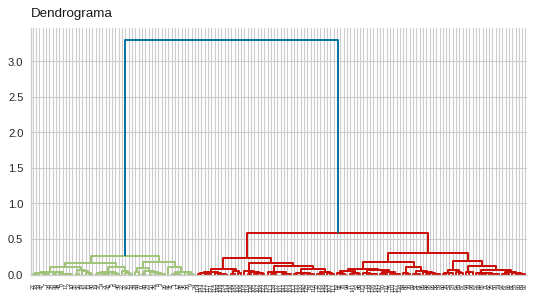

In [46]:
# Obtén la recomendación respecto al número de grupos con el dendrograma
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(8, 4))
plt.title("Dendrograma")


dend = sch.dendrogram(sch.linkage(data_scaled,method='ward'))
#dend = shc.dendrogram(...)
# YOUR CODE HERE
#raise NotImplementedError()

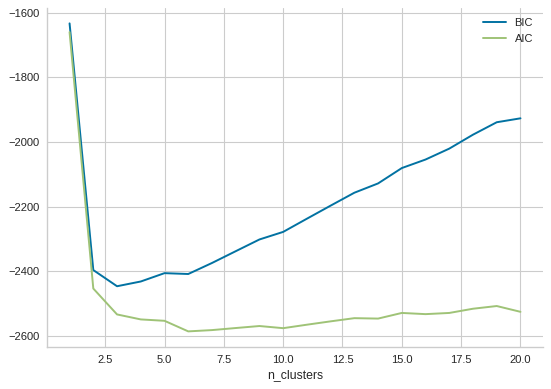

In [47]:
# Obtén la recomendación respecto al número de grupos con los criterios
# AIC y BIC con valores del número de grupos (1,8) y 42 para replicabilidad
from sklearn.mixture import GaussianMixture

n_clusters = np.arange(1, 21)
models = [GaussianMixture(n,covariance_type='full',random_state=0).fit(data_scaled) for n in n_clusters]
plt.plot(n_clusters, [m.bic(data_scaled) for m in models], label='BIC')
plt.plot(n_clusters, [m.aic(data_scaled) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_clusters')
plt.show()
#n_clusters = 
#models = []
#plt.plot(n_clusters, [], label='BIC')
#plt.plot(n_clusters, [], label='AIC')
# YOUR CODE HERE
#raise NotImplementedError()
#plt.legend(loc='best')
#plt.xlabel('n_clusters')

In [48]:
# De acuerdo a tus resultados, indica el número de grupos a obtener
# YOUR CODE HERE
#raise NotImplementedError()
num_grupos =3
print(num_grupos)

3


In [49]:
quiz.eval_numeric('1', num_grupos)

――――――――――――――――――――――――――――――――――――――――
1 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


In [50]:
# Agrupa con k-medias y el número de grupos que indicaste, 42 para replicabilidad
# y obtén el valor de la métrica silhouette con el mismo valor para replicabilidad
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#km = KMeans(...)
kmeans = KMeans(n_clusters=num_grupos, random_state=42)

# Fit the model and predict labels
labels = kmeans.fit_predict(data_scaled)



# Calculate the Silhouette Score
#score = silhouette_score(X, labels)
#print("Silhouette Score:", score)
# Calculate the Silhouette Score
silhouette_km = silhouette_score(data_scaled, labels)

#score = silhouette_score(data_scaled, labels)
print("Silhouette Score:", silhouette_km)
#silhouette_km = silhouette_score(...)
silhouette_km = np.round(silhouette_km, decimals=6) # redondea a 6 decimales, NO lo modifiques
# YOUR CODE HERE
#raise NotImplementedError()
print(silhouette_km)

Silhouette Score: 0.5850557063166895
0.585056


In [51]:
quiz.eval_numeric('2', silhouette_km)

――――――――――――――――――――――――――――――――――――――――
2 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


In [82]:
# Aplica agrupamiento aglomerativo con el número de grupos que indicaste
# y obtén el valor de la métrica silhouette con el valor 42 para replicabilidad
from sklearn.cluster import AgglomerativeClustering
#ac = AgglomerativeClustering(...)
ac = AgglomerativeClustering(n_clusters=num_grupos,metric='euclidean',linkage='ward')
labels=ac.fit_predict(data_scaled)
#silhouette_ac = silhouette_score(...)
silhouette_ac = silhouette_score(data_scaled, labels, random_state=42)

silhouette_ac = np.round(silhouette_ac, decimals=6) # redondea a 6 decimales, NO lo modifiques
# YOUR CODE HERE

print(silhouette_ac)

0.564169


In [83]:
quiz.eval_numeric('3', silhouette_ac)

――――――――――――――――――――――――――――――――――――――――
3 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


In [84]:
# Agrupa con GMM y el número de grupos que indicaste, 42 para replicabilidad
# y obtén el valor de la métrica silhouette con el mismo valor para replicabilidad
#gmm = GaussianMixture(...)
gmm = GaussianMixture(n_components=num_grupos,random_state=42)
#GaussianMixture(n,covariance_type='full',random_state=0)
gmm.fit(data_scaled)
labels = gmm.predict(data_scaled)
#silhouette_gmm = silhouette_score(...)
silhouette_gmm = silhouette_score(data_scaled, labels, random_state=42)
silhouette_gmm = np.round(silhouette_gmm, decimals=6) 
#silhouette_gmm = np.round(silhouette_gmm, decimals=6) # redondea a 6 decimales, NO lo modifiques
# YOUR CODE HERE
#raise NotImplementedError()
 
#print(silhouette_gmm)

In [85]:
quiz.eval_numeric('4', silhouette_gmm)

――――――――――――――――――――――――――――――――――――――――
4 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
